In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [6]:
pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 1.2 MB/s eta 0:01:26
   ---------------------------------------- 0.2/101.1 MB 1.7 MB/s eta 0:00:58
   ---------------------------------------- 0.2/101.1 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.4/101.1 MB 1.2 MB/s eta 0:01:21
   ---------------------------------------- 0.4/101.1 MB 1.2 MB/s eta 0:01:21
   ---------------------------------------- 0.4/101.1 MB 958.5 kB/s eta 0:01:46
   ---------------------------------------- 0.6/101.1 MB 1.2 MB/s eta 0:01:27
   ---------------------------------------- 0.8/101.1 MB 1.4 MB/s eta 0:01:1

In [7]:
import pandas as pd
import numpy as np
#import Regression Modules - ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor

In [9]:
pip install optuna

   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   -------- ------------------------------- 81.9/380.1 kB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 204.8/380.1 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------  378.9/380.1 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 380.1/380.1 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.0 kB ? eta -:--:--
   -------------------------------------- - 225.3/233.0 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 233.0/233.0 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
   ---------------------------------------- 78.6/78.6 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
# import tuing model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.preprocessing import StandardScaler

In [11]:
# split data
from sklearn.model_selection import train_test_split

In [15]:
train_df = pd.read_csv("train.csv")

In [16]:
test_df = pd.read_csv("test.csv")

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

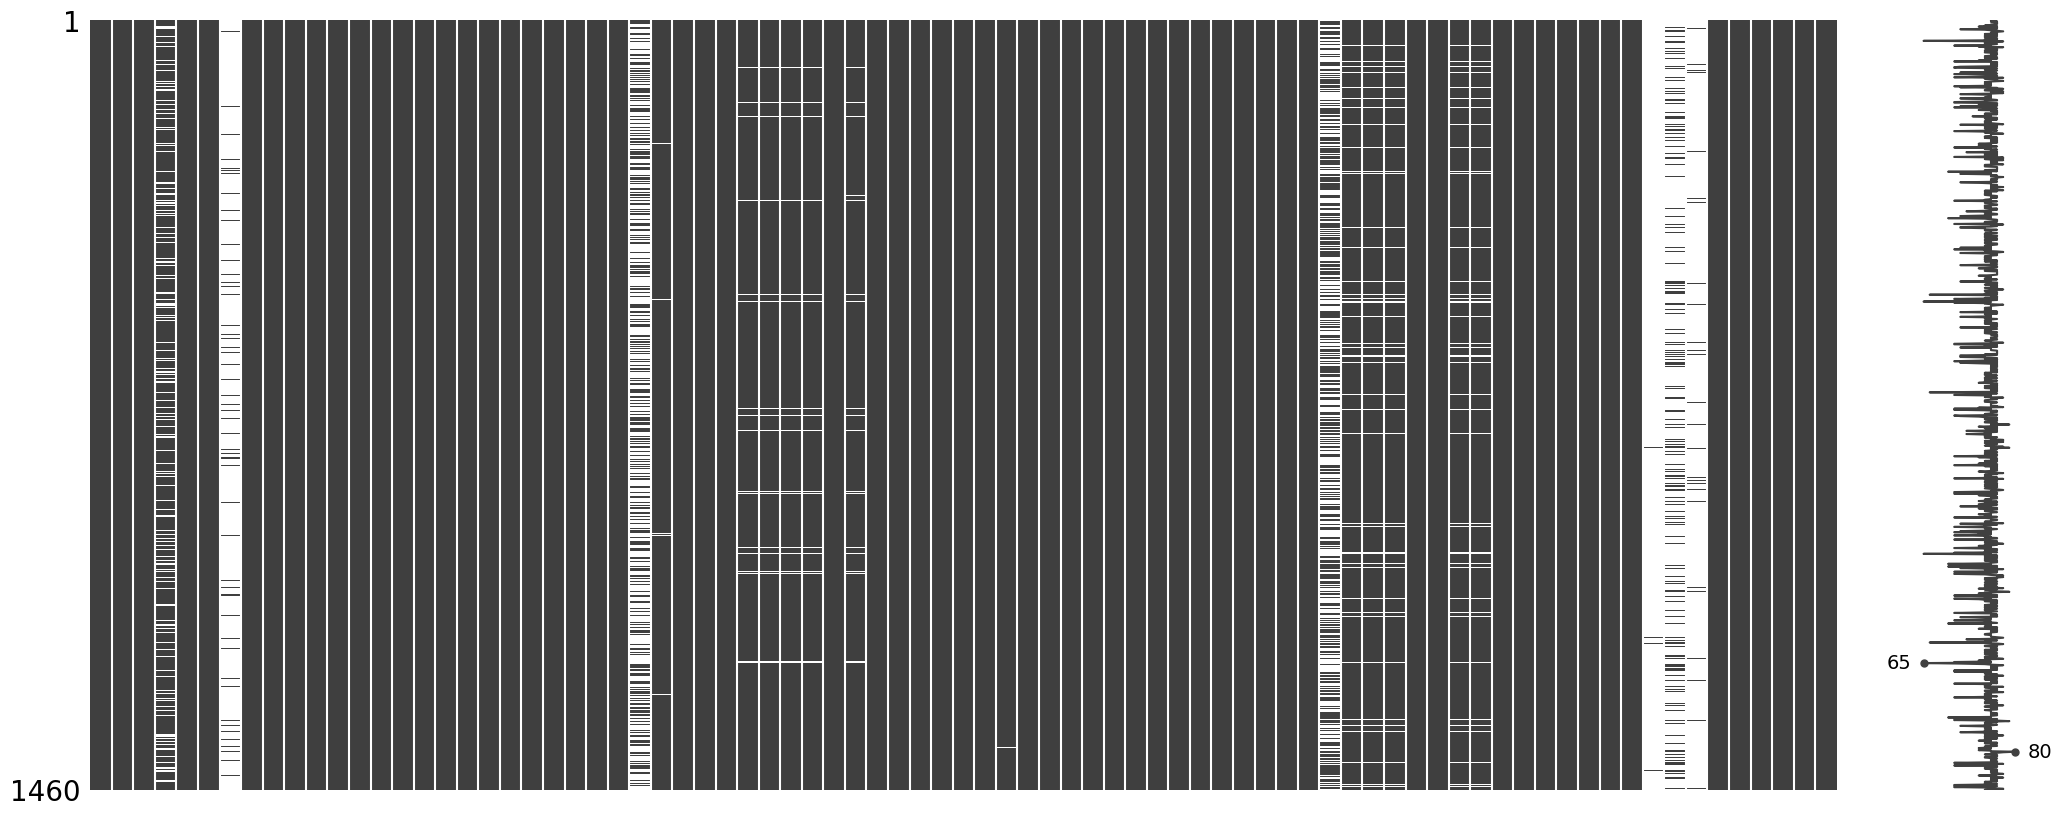

In [18]:
msno.matrix(train_df)

<Axes: >

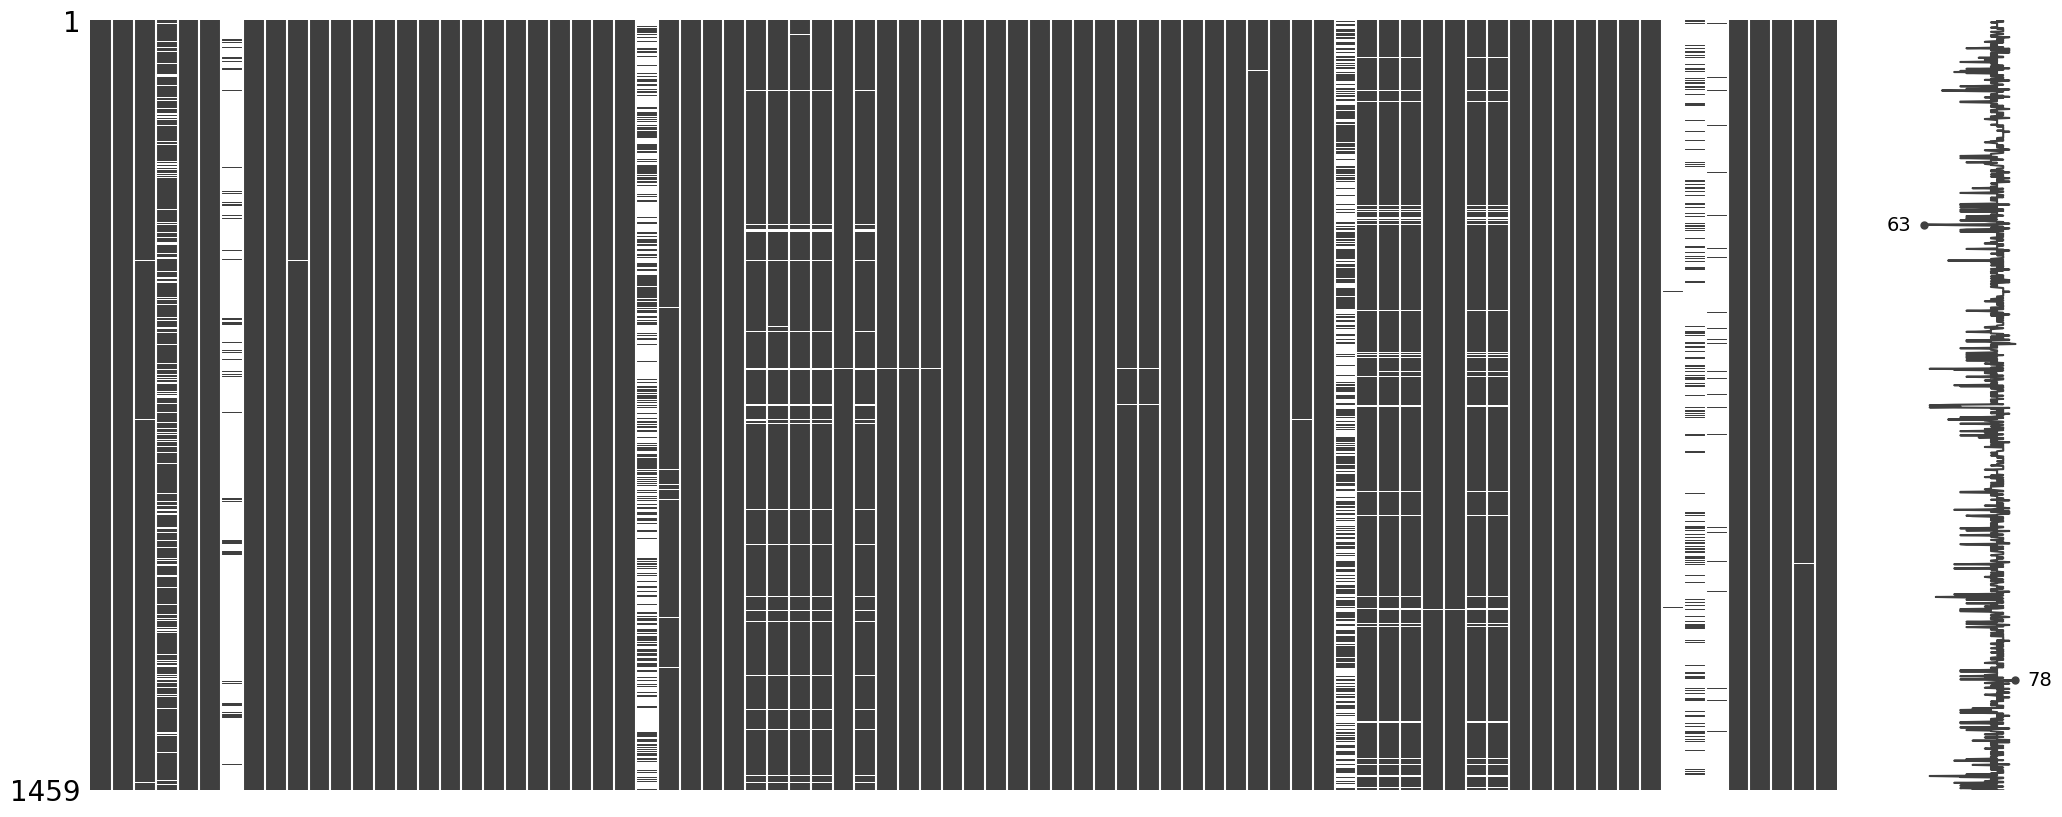

In [19]:
msno.matrix(test_df)

In [20]:
remove_list1=["Id"]
for i in train_df.columns.tolist():
    if train_df[i].isnull().sum() >= 500:
        print(i,train_df[i].isnull().sum())
        remove_list1.append(i)

Alley 1369
MasVnrType 872
FireplaceQu 690
PoolQC 1453
Fence 1179
MiscFeature 1406


In [21]:
train_df = train_df.drop(columns=remove_list1)
test_df = test_df.drop(columns=remove_list1)

In [22]:
object_columns = train_df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [23]:
for i in object_columns:
    frequency = train_df[i].value_counts(normalize=True)  # Normalize to get frequency ratio
    train_df[str(i)+'_encoded'] = train_df[i].map(frequency)
for i in object_columns:
    train_df = train_df.drop(columns = [i])

In [24]:
object_columns = test_df.select_dtypes(include=['object']).columns.tolist()
for i in object_columns:
    frequency = test_df[i].value_counts(normalize=True)  # Normalize to get frequency ratio
    test_df[str(i)+'_encoded'] = test_df[i].map(frequency)
for i in object_columns:
    test_df = test_df.drop(columns = [i])

In [25]:
per_df = pd.DataFrame()
for i in range(len(train_df)):
    if train_df.iloc[i].isnull().sum() == 0:
        per_df = per_df._append(train_df.iloc[i], ignore_index=True)

In [26]:
per_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.914325,0.503425,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.914325,0.401370,0.931507,0.280638,0.438724,0.950689,0.961566,0.917808,0.867808,0.069178
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548


In [27]:
per_test_df = per_df.drop(columns=['SalePrice'])
per_test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.914325,0.503425,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.914325,0.401370,0.931507,0.280638,0.438724,0.950689,0.961566,0.917808,0.867808,0.069178
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548


In [28]:
train_null_columns = []
train_null_sum = []
for i in range(len(train_df)):
    if train_df.iloc[i].isnull().sum() > 0:
        train_null_columns.append(i)
        train_null_sum.append(train_df.iloc[i].isnull().sum())

In [29]:
per_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.914325,0.503425,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.914325,0.401370,0.931507,0.280638,0.438724,0.950689,0.961566,0.917808,0.867808,0.069178
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.914325,0.503425,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
1090,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,0.914325,0.503425,0.021233,0.630892,0.438724,0.950689,0.961566,0.917808,0.867808,0.820548
1091,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
1092,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,0.064428,0.401370,0.931507,0.630892,0.438724,0.950689,0.961566,0.917808,0.867808,0.820548


In [30]:
print("Row with null value",train_null_columns,end=" ")
print("\n\n","the number of null values",train_null_sum,end=" ")

Row with null value [7, 12, 14, 16, 17, 24, 31, 39, 42, 43, 48, 50, 64, 66, 76, 78, 84, 88, 89, 90, 95, 99, 100, 102, 104, 108, 111, 113, 116, 120, 125, 126, 127, 131, 133, 136, 140, 147, 148, 149, 152, 153, 155, 156, 160, 163, 165, 166, 169, 170, 177, 180, 182, 186, 191, 198, 203, 207, 208, 210, 214, 218, 221, 234, 237, 241, 244, 249, 250, 259, 269, 287, 288, 291, 293, 307, 308, 310, 319, 328, 330, 332, 335, 342, 346, 347, 351, 356, 360, 361, 362, 364, 366, 369, 370, 371, 375, 384, 386, 392, 393, 404, 405, 412, 421, 426, 431, 434, 441, 447, 452, 457, 458, 459, 464, 465, 470, 484, 490, 495, 496, 516, 518, 520, 528, 529, 532, 533, 535, 537, 538, 539, 541, 545, 553, 559, 560, 562, 564, 569, 580, 582, 593, 610, 611, 612, 613, 614, 616, 620, 623, 626, 635, 636, 638, 641, 645, 646, 649, 650, 660, 666, 668, 672, 679, 682, 685, 687, 690, 705, 706, 709, 710, 714, 720, 721, 726, 734, 736, 738, 745, 746, 749, 750, 751, 757, 770, 778, 783, 784, 785, 789, 791, 794, 811, 816, 817, 822, 826, 828, 84

In [31]:
def fill_null_val(per,df):
    filled_df = df.copy()

    null_columns = []
    null_sum = []
    for i in range(len(filled_df)):
        if filled_df.iloc[i].isnull().sum() > 0:
            null_columns.append(i)
            null_sum.append(filled_df.iloc[i].isnull().sum())
    for t in null_columns:
        d_f = filled_df.copy()
        result = d_f.iloc[t].isnull()
        null_columns_name = result[result].index.tolist()

        # train model - use per_df data
        y = pd.DataFrame(per[null_columns_name])
        X = pd.DataFrame(per.drop(columns=null_columns_name))
        model = MultiOutputRegressor(LinearRegression())

        # create model
        model.fit(X, y)
        # insert to actual data - from train/test data
        X_test = pd.DataFrame(d_f.loc[t])

        # generate to dataframe
        result_df = pd.DataFrame(X_test, columns=X_test.columns)

        # exchange column - index
        X_test = result_df.T
        X_test = X_test.drop(columns=null_columns_name)

        y_pred = model.predict(X_test)

        for i in range(len(null_columns_name)):
            d_f.loc[t, null_columns_name[i]] = y_pred.tolist()[0][i]
            filled_df = d_f.copy()
    
    return filled_df

<Axes: >

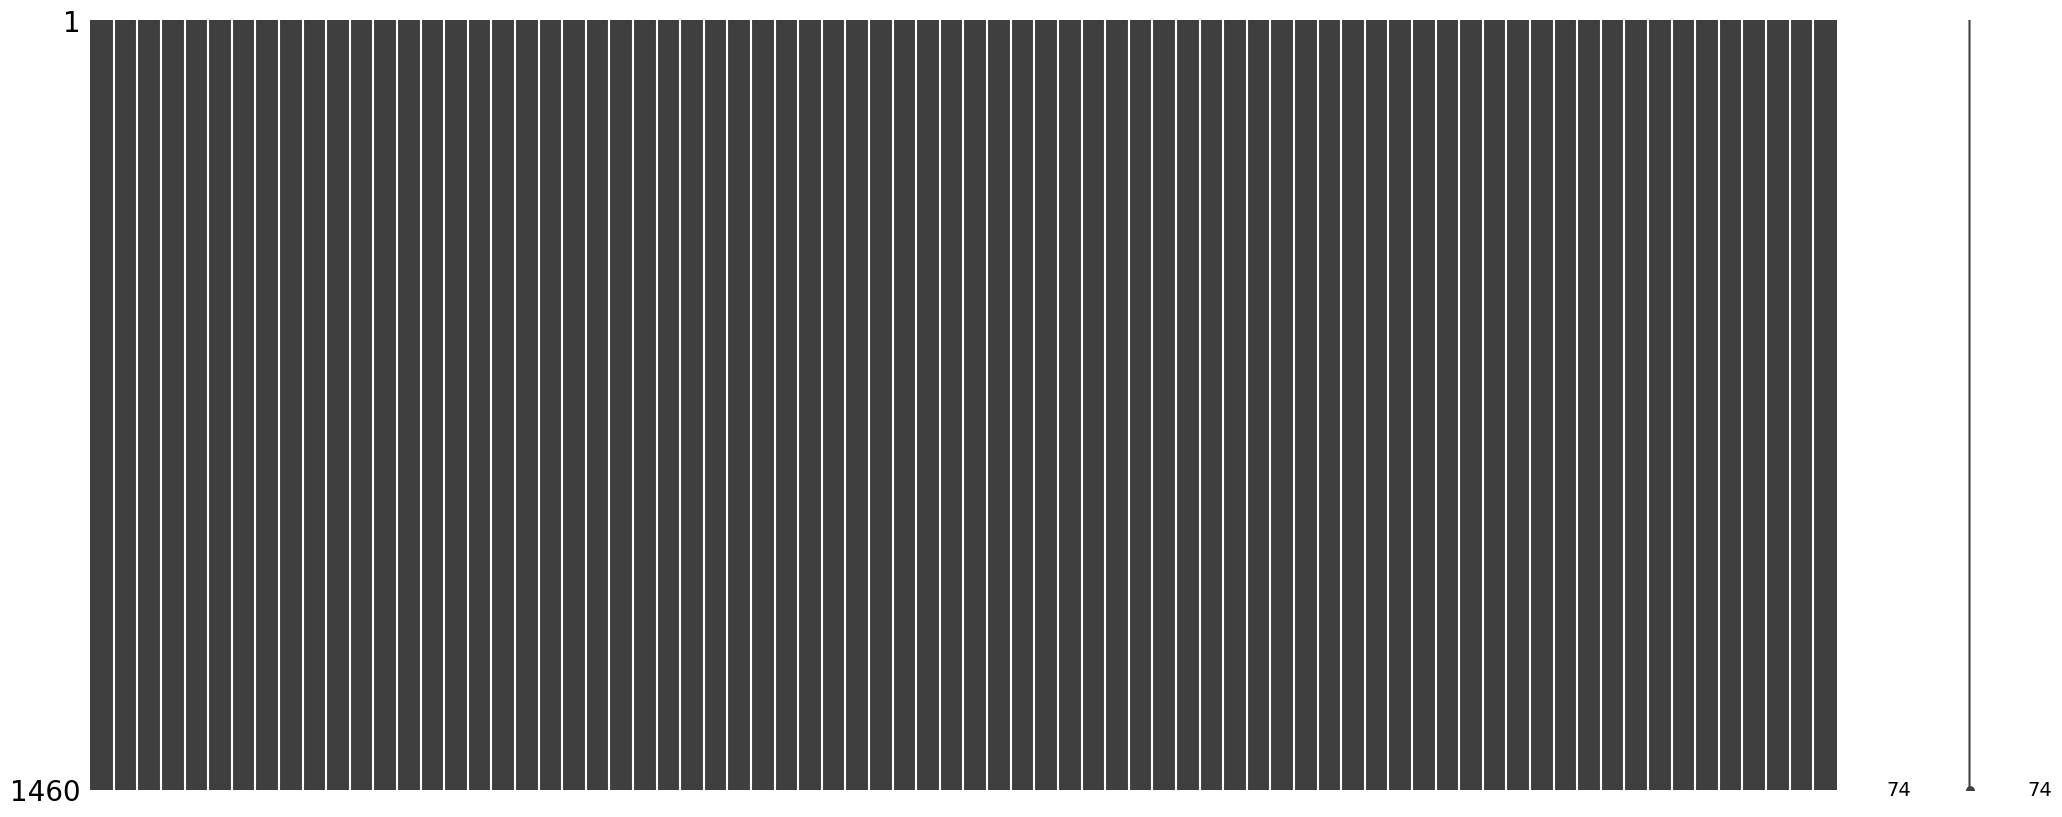

In [32]:
filled_train_df = fill_null_val(per_df,train_df)
msno.matrix(filled_train_df)

In [33]:
per_test_df = per_df.copy()
column_to_move = 'SalePrice'

new_order = [col for col in per_test_df.columns if col != column_to_move] + [column_to_move]
per_test_df = per_test_df[new_order]
per_test_df = per_test_df.iloc[:,:-1]
per_test_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.914325,0.503425,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.914325,0.401370,0.931507,0.280638,0.438724,0.950689,0.961566,0.917808,0.867808,0.069178
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.914325,0.503425,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
1090,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,0.914325,0.503425,0.021233,0.630892,0.438724,0.950689,0.961566,0.917808,0.867808,0.820548
1091,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.914325,0.401370,0.931507,0.630892,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548
1092,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,0.064428,0.401370,0.931507,0.630892,0.438724,0.950689,0.961566,0.917808,0.867808,0.820548


<Axes: >

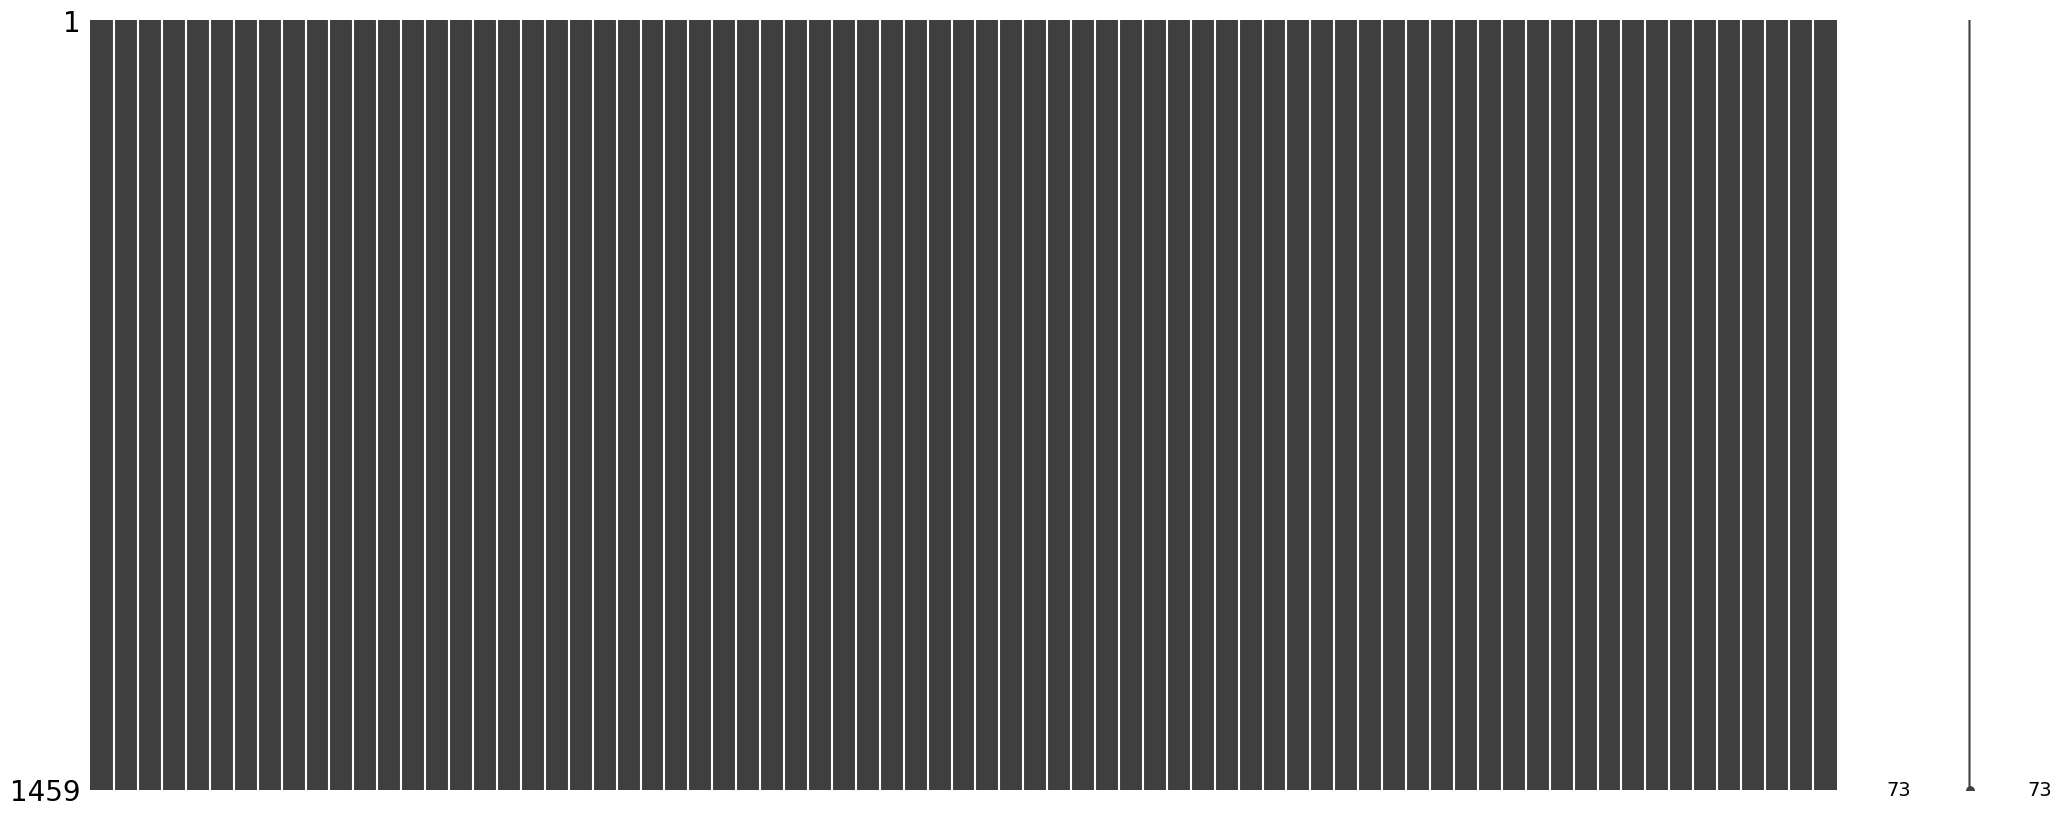

In [34]:
filled_test_df = fill_null_val(per_test_df,test_df)
msno.matrix(filled_test_df)

In [35]:
def features_(filled_train_df):
    filled_train_df['TotalBathArea'] = filled_train_df['FullBath'] + 0.5 * filled_train_df['HalfBath']
    filled_train_df['TotalBathroomArea'] = filled_train_df['FullBath'] + 0.5 * filled_train_df['HalfBath']
    outdoor_features = ['WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch']
    filled_train_df['TotalOutdoorArea'] = filled_train_df[outdoor_features].sum(axis=1)
    basement_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
    filled_train_df['TotalBasementArea'] = filled_train_df[basement_features].sum(axis=1)

In [36]:
for i in [filled_train_df,filled_test_df,per_df]:
    features_(i)

In [37]:
filled_train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,TotalBathArea,TotalBathroomArea,TotalOutdoorArea,TotalBasementArea
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,61,1712
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548,2.0,2.0,298,2524
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,42,1840
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.438724,0.950689,0.961566,0.917808,0.867808,0.069178,1.0,1.0,35,1512
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,276,2290


In [38]:
filled_test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,TotalBathArea,TotalBathroomArea,TotalOutdoorArea,TotalBasementArea
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.452571,0.936278,0.961622,0.891707,0.862826,0.825223,1.0,1.0,260,1764.0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.452571,0.936278,0.961622,0.891707,0.862826,0.825223,1.5,1.5,429,2658.0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.265749,0.936278,0.961622,0.891707,0.862826,0.825223,2.5,2.5,246,1856.0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.265749,0.936278,0.961622,0.891707,0.862826,0.825223,2.5,2.5,396,1852.0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.281680,0.936278,0.961622,0.891707,0.862826,0.825223,2.0,2.0,226,2560.0


In [39]:
per_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,TotalBathArea,TotalBathroomArea,TotalOutdoorArea,TotalBasementArea
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,61.0,1712.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548,2.0,2.0,298.0,2524.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,42.0,1840.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.438724,0.950689,0.961566,0.917808,0.867808,0.069178,1.0,1.0,35.0,1512.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.306019,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,276.0,2290.0


<Axes: title={'center': 'Person Correlation of Features'}>

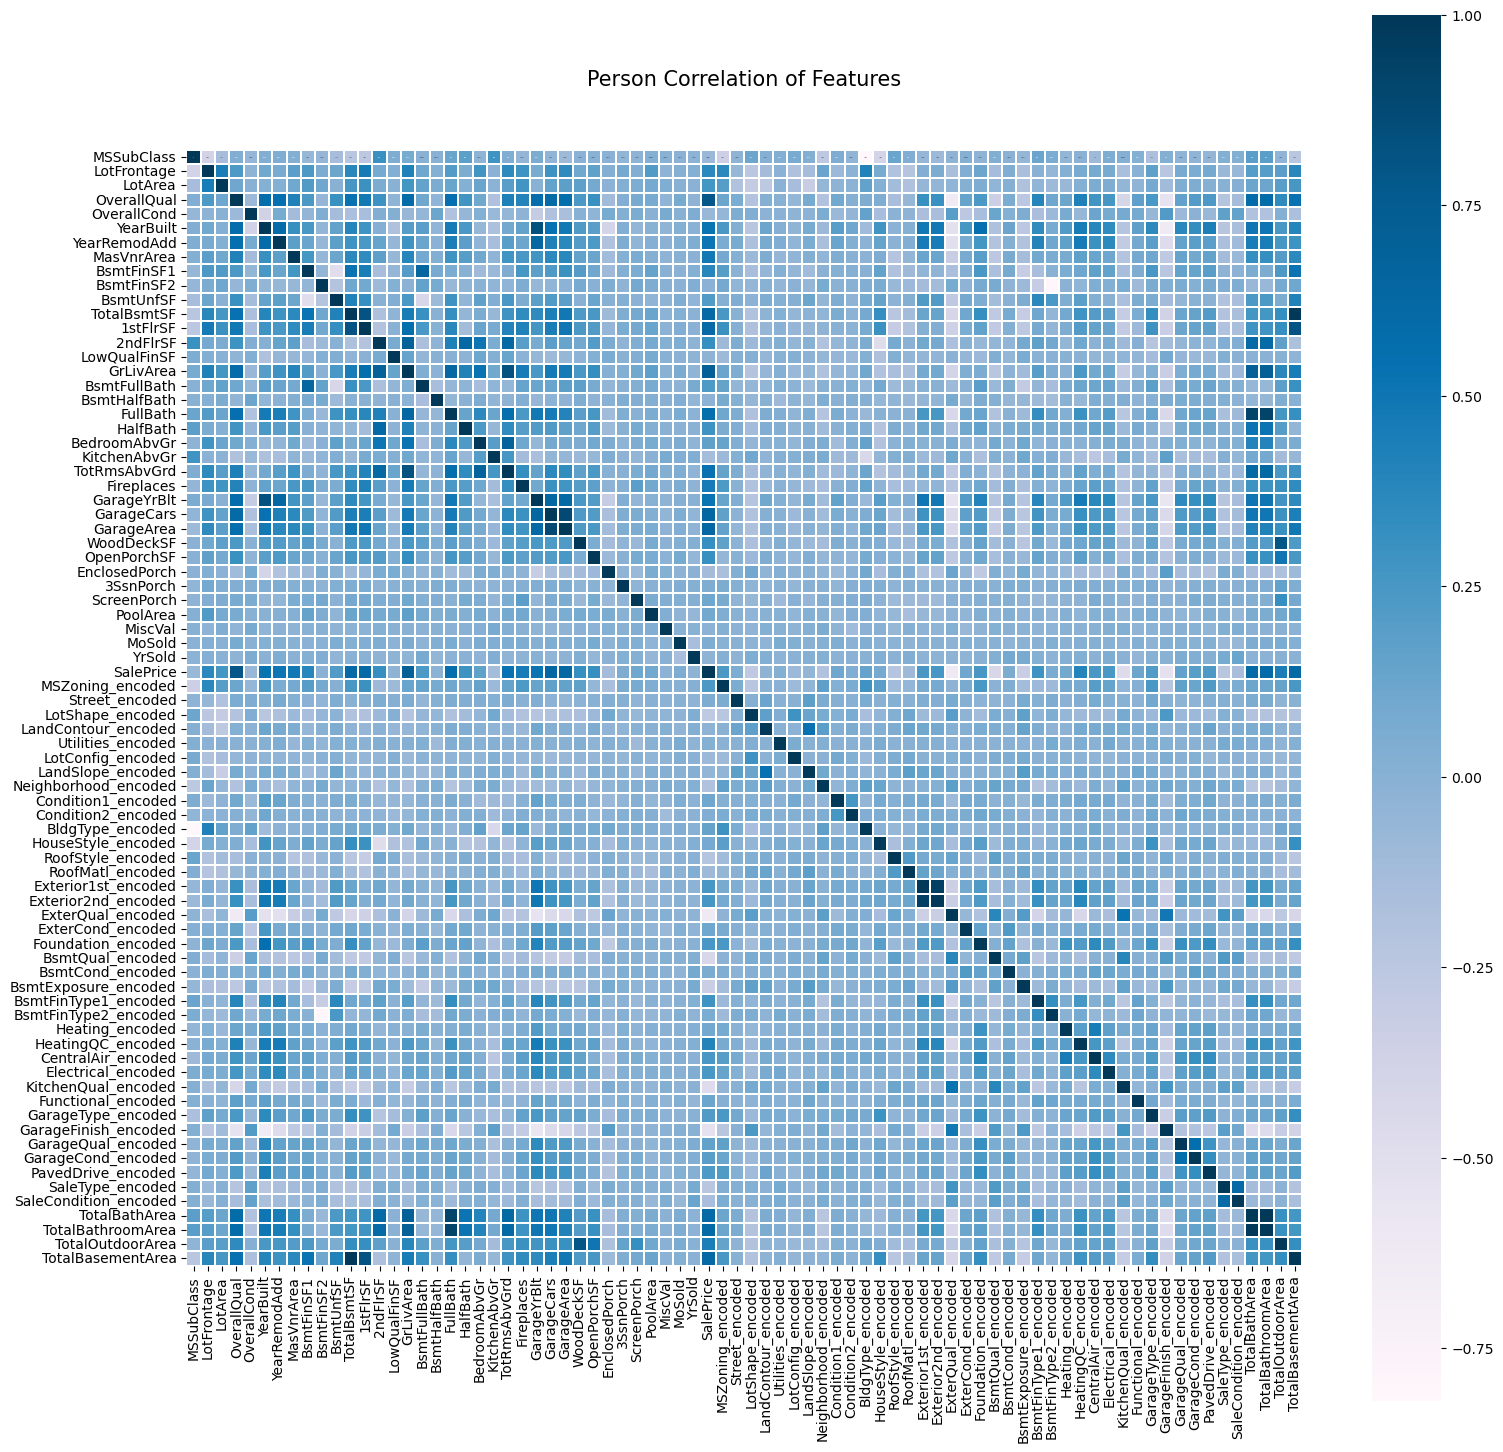

In [40]:
colormap = plt.cm.PuBu
plt.figure(figsize=(18, 18))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(filled_train_df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 0})

In [41]:
corr = per_df.corr(method ="pearson")
sp_corr = corr.iloc[corr.index.tolist().index("SalePrice")].values.tolist()
left_col = []
for i in range(len(sp_corr)):
    if type(sp_corr[i]) == float:
        if sp_corr[i] >= 0.25:
            left_col.append(corr.index[i])
print(left_col,end = " ")

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'Exterior1st_encoded', 'Exterior2nd_encoded', 'BsmtFinType1_encoded', 'HeatingQC_encoded', 'TotalBathArea', 'TotalBathroomArea', 'TotalOutdoorArea', 'TotalBasementArea'] 

In [42]:
corr = per_df.corr(method ="pearson")
sp_corr = corr.iloc[corr.index.tolist().index("SalePrice")].values.tolist()
left_col = []
for i in range(len(sp_corr)):
    if type(sp_corr[i]) == float:
        if sp_corr[i] >= 0.25:
            left_col.append(corr.index[i])
print(left_col,end = " ")

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'Exterior1st_encoded', 'Exterior2nd_encoded', 'BsmtFinType1_encoded', 'HeatingQC_encoded', 'TotalBathArea', 'TotalBathroomArea', 'TotalOutdoorArea', 'TotalBasementArea'] 

In [43]:
new_df = filled_train_df[left_col]

column_to_move = 'SalePrice'

new_order = [col for col in new_df.columns if col != column_to_move] + [column_to_move]
new_df = new_df[new_order]

(new_df)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OpenPorchSF,Exterior1st_encoded,Exterior2nd_encoded,BsmtFinType1_encoded,HeatingQC_encoded,TotalBathArea,TotalBathroomArea,TotalOutdoorArea,TotalBasementArea,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,856,856,854,...,61,0.352740,0.345205,0.293746,0.507534,2.5,2.5,61,1712,208500
1,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,...,0,0.150685,0.146575,0.154603,0.507534,2.0,2.0,298,2524,181500
2,68.0,11250,7,2001,2002,162.0,486,920,920,866,...,42,0.352740,0.345205,0.293746,0.507534,2.5,2.5,42,1840,223500
3,60.0,9550,7,1915,1970,0.0,216,756,961,756,...,35,0.141096,0.026027,0.154603,0.165068,1.0,1.0,35,1512,140000
4,84.0,14260,8,2000,2000,350.0,655,1145,1145,1053,...,84,0.352740,0.345205,0.293746,0.507534,2.5,2.5,276,2290,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,694,...,40,0.352740,0.345205,0.302178,0.507534,2.5,2.5,40,1906,175000
1456,85.0,13175,6,1978,1988,119.0,790,1542,2073,0,...,0,0.073973,0.097260,0.154603,0.293151,2.0,2.0,349,3084,210000
1457,66.0,9042,7,1941,2006,0.0,275,1152,1188,1152,...,60,0.041781,0.041096,0.293746,0.507534,2.0,2.0,60,2304,266500
1458,68.0,9717,5,1950,1996,0.0,49,1078,1078,0,...,0,0.150685,0.146575,0.293746,0.165068,1.0,1.0,366,2156,142125


In [44]:
column_to_move = 'SalePrice'

new_order = [col for col in filled_train_df.columns if col != column_to_move] + [column_to_move]
filled_train_df = filled_train_df[new_order]

(filled_train_df)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,TotalBathArea,TotalBathroomArea,TotalOutdoorArea,TotalBasementArea,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,61,1712,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.0,2.0,298,2524,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,42,1840,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.950689,0.961566,0.917808,0.867808,0.069178,1.0,1.0,35,1512,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,276,2290,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,40,1906,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.0,2.0,349,3084,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.0,2.0,60,2304,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0.950689,0.961566,0.917808,0.867808,0.820548,1.0,1.0,366,2156,142125


In [45]:
column_to_move = 'SalePrice'

new_order = [col for col in per_df.columns if col != column_to_move] + [column_to_move]
per_df = per_df[new_order]

per_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,TotalBathArea,TotalBathroomArea,TotalOutdoorArea,TotalBasementArea,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,61.0,1712.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.0,2.0,298.0,2524.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,42.0,1840.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.950689,0.961566,0.917808,0.867808,0.069178,1.0,1.0,35.0,1512.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,276.0,2290.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.5,2.5,40.0,1906.0,175000.0
1090,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.0,2.0,349.0,3084.0,210000.0
1091,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.950689,0.961566,0.917808,0.867808,0.820548,2.0,2.0,60.0,2304.0,266500.0
1092,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,0.950689,0.961566,0.917808,0.867808,0.820548,1.0,1.0,366.0,2156.0,142125.0


In [46]:
data_frames = [new_df, per_df, filled_train_df]
scaler = StandardScaler()
for i in range(len(data_frames)):
  data_frames[i] = scaler.fit_transform(data_frames[i])

In [47]:
new_df

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OpenPorchSF,Exterior1st_encoded,Exterior2nd_encoded,BsmtFinType1_encoded,HeatingQC_encoded,TotalBathArea,TotalBathroomArea,TotalOutdoorArea,TotalBasementArea,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,856,856,854,...,61,0.352740,0.345205,0.293746,0.507534,2.5,2.5,61,1712,208500
1,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,...,0,0.150685,0.146575,0.154603,0.507534,2.0,2.0,298,2524,181500
2,68.0,11250,7,2001,2002,162.0,486,920,920,866,...,42,0.352740,0.345205,0.293746,0.507534,2.5,2.5,42,1840,223500
3,60.0,9550,7,1915,1970,0.0,216,756,961,756,...,35,0.141096,0.026027,0.154603,0.165068,1.0,1.0,35,1512,140000
4,84.0,14260,8,2000,2000,350.0,655,1145,1145,1053,...,84,0.352740,0.345205,0.293746,0.507534,2.5,2.5,276,2290,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,694,...,40,0.352740,0.345205,0.302178,0.507534,2.5,2.5,40,1906,175000
1456,85.0,13175,6,1978,1988,119.0,790,1542,2073,0,...,0,0.073973,0.097260,0.154603,0.293151,2.0,2.0,349,3084,210000
1457,66.0,9042,7,1941,2006,0.0,275,1152,1188,1152,...,60,0.041781,0.041096,0.293746,0.507534,2.0,2.0,60,2304,266500
1458,68.0,9717,5,1950,1996,0.0,49,1078,1078,0,...,0,0.150685,0.146575,0.293746,0.165068,1.0,1.0,366,2156,142125


In [48]:
new_df = new_df.loc[:, ['TotalBathArea', 'TotalBathroomArea','TotalOutdoorArea','TotalBasementArea','SalePrice']]
print(new_df)

      TotalBathArea  TotalBathroomArea  TotalOutdoorArea  TotalBasementArea  \
0               2.5                2.5                61               1712   
1               2.0                2.0               298               2524   
2               2.5                2.5                42               1840   
3               1.0                1.0                35               1512   
4               2.5                2.5               276               2290   
...             ...                ...               ...                ...   
1455            2.5                2.5                40               1906   
1456            2.0                2.0               349               3084   
1457            2.0                2.0                60               2304   
1458            1.0                1.0               366               2156   
1459            1.5                1.5               804               2512   

      SalePrice  
0        208500  
1        181500

In [49]:
per_df = per_df.loc[:, ['TotalBathArea', 'TotalBathroomArea','TotalOutdoorArea','TotalBasementArea','SalePrice']]
print(per_df)

      TotalBathArea  TotalBathroomArea  TotalOutdoorArea  TotalBasementArea  \
0               2.5                2.5              61.0             1712.0   
1               2.0                2.0             298.0             2524.0   
2               2.5                2.5              42.0             1840.0   
3               1.0                1.0              35.0             1512.0   
4               2.5                2.5             276.0             2290.0   
...             ...                ...               ...                ...   
1089            2.5                2.5              40.0             1906.0   
1090            2.0                2.0             349.0             3084.0   
1091            2.0                2.0              60.0             2304.0   
1092            1.0                1.0             366.0             2156.0   
1093            1.5                1.5             804.0             2512.0   

      SalePrice  
0      208500.0  
1      181500.0

In [50]:
filled_train_df = filled_train_df.loc[:, ['TotalBathArea', 'TotalBathroomArea','TotalOutdoorArea','TotalBasementArea','SalePrice']]
print(filled_train_df)

      TotalBathArea  TotalBathroomArea  TotalOutdoorArea  TotalBasementArea  \
0               2.5                2.5                61               1712   
1               2.0                2.0               298               2524   
2               2.5                2.5                42               1840   
3               1.0                1.0                35               1512   
4               2.5                2.5               276               2290   
...             ...                ...               ...                ...   
1455            2.5                2.5                40               1906   
1456            2.0                2.0               349               3084   
1457            2.0                2.0                60               2304   
1458            1.0                1.0               366               2156   
1459            1.5                1.5               804               2512   

      SalePrice  
0        208500  
1        181500

In [51]:
filled_test_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,TotalBathArea,TotalBathroomArea,TotalOutdoorArea,TotalBasementArea
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.452571,0.936278,0.961622,0.891707,0.862826,0.825223,1.0,1.0,260,1764.0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.452571,0.936278,0.961622,0.891707,0.862826,0.825223,1.5,1.5,429,2658.0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.265749,0.936278,0.961622,0.891707,0.862826,0.825223,2.5,2.5,246,1856.0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.265749,0.936278,0.961622,0.891707,0.862826,0.825223,2.5,2.5,396,1852.0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.281680,0.936278,0.961622,0.891707,0.862826,0.825223,2.0,2.0,226,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.433491,0.865288,0.922705,0.891707,0.862826,0.825223,1.5,1.5,0,1092.0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.452571,0.936278,0.961622,0.891707,0.862826,0.061001,1.5,1.5,24,1092.0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.452571,0.936278,0.961622,0.891707,0.862826,0.061001,1.0,1.0,474,2448.0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.370231,0.941486,0.901317,0.891707,0.862826,0.825223,1.0,1.0,112,1824.0


In [52]:
filled_test_df = filled_test_df.loc[:, ['TotalBathArea', 'TotalBathroomArea','TotalOutdoorArea','TotalBasementArea']]
print(filled_test_df)

      TotalBathArea  TotalBathroomArea  TotalOutdoorArea  TotalBasementArea
0               1.0                1.0               260             1764.0
1               1.5                1.5               429             2658.0
2               2.5                2.5               246             1856.0
3               2.5                2.5               396             1852.0
4               2.0                2.0               226             2560.0
...             ...                ...               ...                ...
1454            1.5                1.5                 0             1092.0
1455            1.5                1.5                24             1092.0
1456            1.0                1.0               474             2448.0
1457            1.0                1.0               112             1824.0
1458            2.5                2.5               238             1992.0

[1459 rows x 4 columns]


In [54]:
def differ_df_ml(df_type):
    import pandas as pd
    import numpy as np
    X = df_type.iloc[:,:-1]
    y = df_type.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    
    k_fold = KFold(n_splits = 9, shuffle=True, random_state = 0)

    lr_model = LinearRegression()
    rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
    cb_model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE')

    lr_model.fit(X_train, y_train)
    rf_regressor.fit(X_train, y_train)
    cb_model.fit(X_train, y_train, verbose=100)

    lr_pred = lr_model.predict(X_test)
    rf_pred = rf_regressor.predict(X_test)
    cb_pred = cb_model.predict(X_test)
        
    lr_mse = mean_squared_error(y_test, lr_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    cb_mse = mean_squared_error(y_test, cb_pred)
    print(f'CB - RMSE: {cb_mse**0.5:.2f}')
    print(f'RF - RMSE: {rf_mse**0.5:.2f}')
    print(f'LR - RMSE: {lr_mse**0.5:.2f}')

In [55]:
differ_df_ml(filled_train_df)

0:	learn: 73689.5934678	total: 160ms	remaining: 2m 39s
100:	learn: 33834.4348869	total: 296ms	remaining: 2.63s
200:	learn: 29575.6460715	total: 444ms	remaining: 1.76s
300:	learn: 26537.8464292	total: 588ms	remaining: 1.37s
400:	learn: 24203.3978912	total: 735ms	remaining: 1.1s
500:	learn: 22353.7762103	total: 885ms	remaining: 881ms
600:	learn: 20981.5711169	total: 1.03s	remaining: 686ms
700:	learn: 19742.7319990	total: 1.18s	remaining: 502ms
800:	learn: 18690.6662202	total: 1.33s	remaining: 330ms
900:	learn: 17795.4600301	total: 1.47s	remaining: 161ms
999:	learn: 17012.1390735	total: 1.63s	remaining: 0us
CB - RMSE: 45679.37
RF - RMSE: 42800.79
LR - RMSE: 50626.54


In [56]:
differ_df_ml(per_df)

0:	learn: 78038.5535069	total: 3.66ms	remaining: 3.65s
100:	learn: 32684.7552577	total: 128ms	remaining: 1.14s
200:	learn: 27586.1004804	total: 256ms	remaining: 1.02s
300:	learn: 24520.5370642	total: 379ms	remaining: 879ms
400:	learn: 22301.8810011	total: 506ms	remaining: 756ms
500:	learn: 20619.9074212	total: 628ms	remaining: 625ms
600:	learn: 19131.4662162	total: 758ms	remaining: 503ms
700:	learn: 17843.4413498	total: 882ms	remaining: 376ms
800:	learn: 16685.2927680	total: 1.01s	remaining: 252ms
900:	learn: 15759.9812709	total: 1.14s	remaining: 125ms
999:	learn: 14961.3566718	total: 1.26s	remaining: 0us
CB - RMSE: 41345.76
RF - RMSE: 41643.07
LR - RMSE: 49687.37


In [57]:
differ_df_ml(new_df)

0:	learn: 73689.5934678	total: 1.74ms	remaining: 1.73s
100:	learn: 33834.4348869	total: 151ms	remaining: 1.35s
200:	learn: 29575.6460715	total: 309ms	remaining: 1.23s
300:	learn: 26537.8464292	total: 462ms	remaining: 1.07s
400:	learn: 24203.3978912	total: 630ms	remaining: 942ms
500:	learn: 22353.7762103	total: 787ms	remaining: 784ms
600:	learn: 20981.5711169	total: 942ms	remaining: 625ms
700:	learn: 19742.7319990	total: 1.09s	remaining: 467ms
800:	learn: 18690.6662202	total: 1.25s	remaining: 311ms
900:	learn: 17795.4600301	total: 1.41s	remaining: 155ms
999:	learn: 17012.1390735	total: 1.56s	remaining: 0us
CB - RMSE: 45679.37
RF - RMSE: 42800.79
LR - RMSE: 50626.54


In [58]:
new_X = new_df.iloc[:,:-1]
new_y = new_df.iloc[:,-1]

per_X = per_df.iloc[:,:-1]
per_y = per_df.iloc[:,-1]

ft_X = filled_train_df.iloc[:,:-1]
ft_y = filled_train_df.iloc[:,-1]

In [59]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
per_X_train, per_X_test, per_y_train, per_y_test = train_test_split(per_X, per_y, test_size=0.2, random_state=42)
ft_X_train, ft_X_test, ft_y_train, ft_y_test = train_test_split(ft_X, ft_y, test_size=0.2, random_state=42)

In [60]:
new_rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
ft_rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
per_cb_model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE')

new_rf_regressor.fit(new_X_train, new_y_train)
ft_rf_regressor.fit(ft_X_train, ft_y_train)
per_cb_model.fit(per_X_train, per_y_train, verbose=100)

new_rf_pred = new_rf_regressor.predict(new_X_test)
ft_rf_pred = ft_rf_regressor.predict(ft_X_test)
per_cb_pred = per_cb_model.predict(per_X_test)

0:	learn: 77724.4738747	total: 1.71ms	remaining: 1.71s
100:	learn: 32124.1797899	total: 123ms	remaining: 1.09s
200:	learn: 27252.0665221	total: 253ms	remaining: 1.01s
300:	learn: 23781.6919096	total: 382ms	remaining: 886ms
400:	learn: 21507.2497244	total: 512ms	remaining: 765ms
500:	learn: 19698.1285063	total: 637ms	remaining: 635ms
600:	learn: 18287.4002548	total: 767ms	remaining: 509ms
700:	learn: 17115.2618638	total: 896ms	remaining: 382ms
800:	learn: 16038.2850969	total: 1.03s	remaining: 255ms
900:	learn: 15101.3877301	total: 1.15s	remaining: 127ms
999:	learn: 14339.7563117	total: 1.28s	remaining: 0us


In [61]:
name_list = ["new_rf","ft_rf","per_cb"]
ml_list = [new_rf_pred,ft_rf_pred,per_cb_pred]
test_list = [new_y_test,ft_y_test,per_y_test]

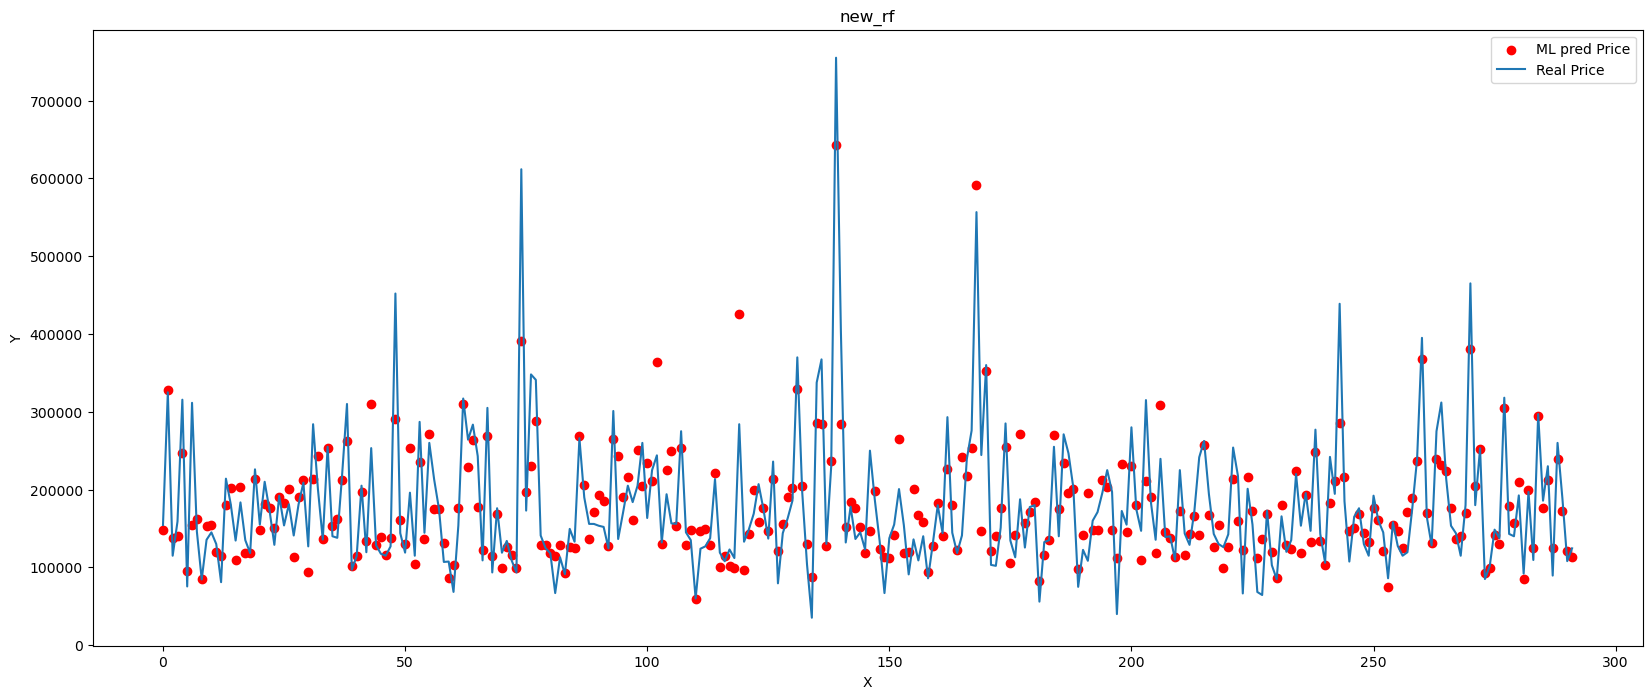

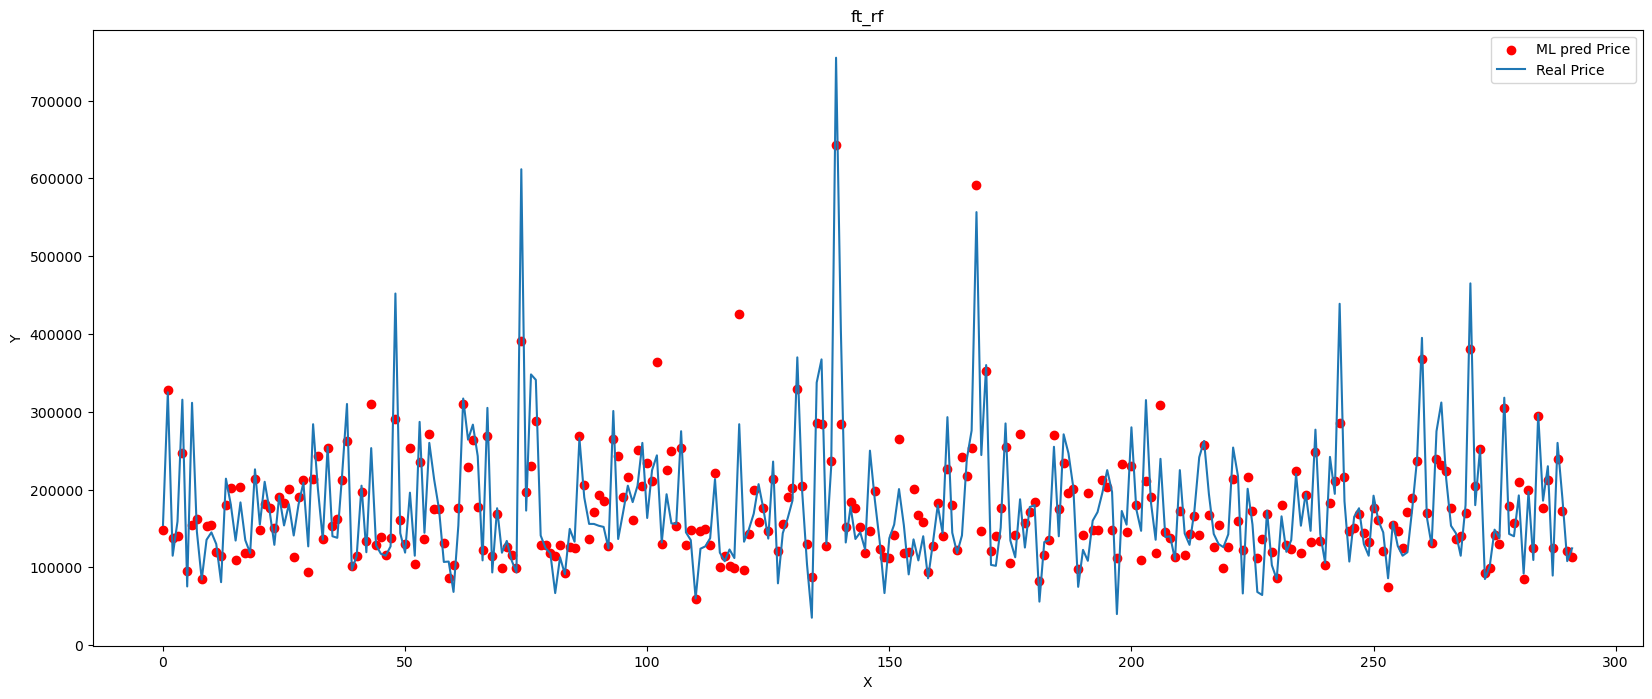

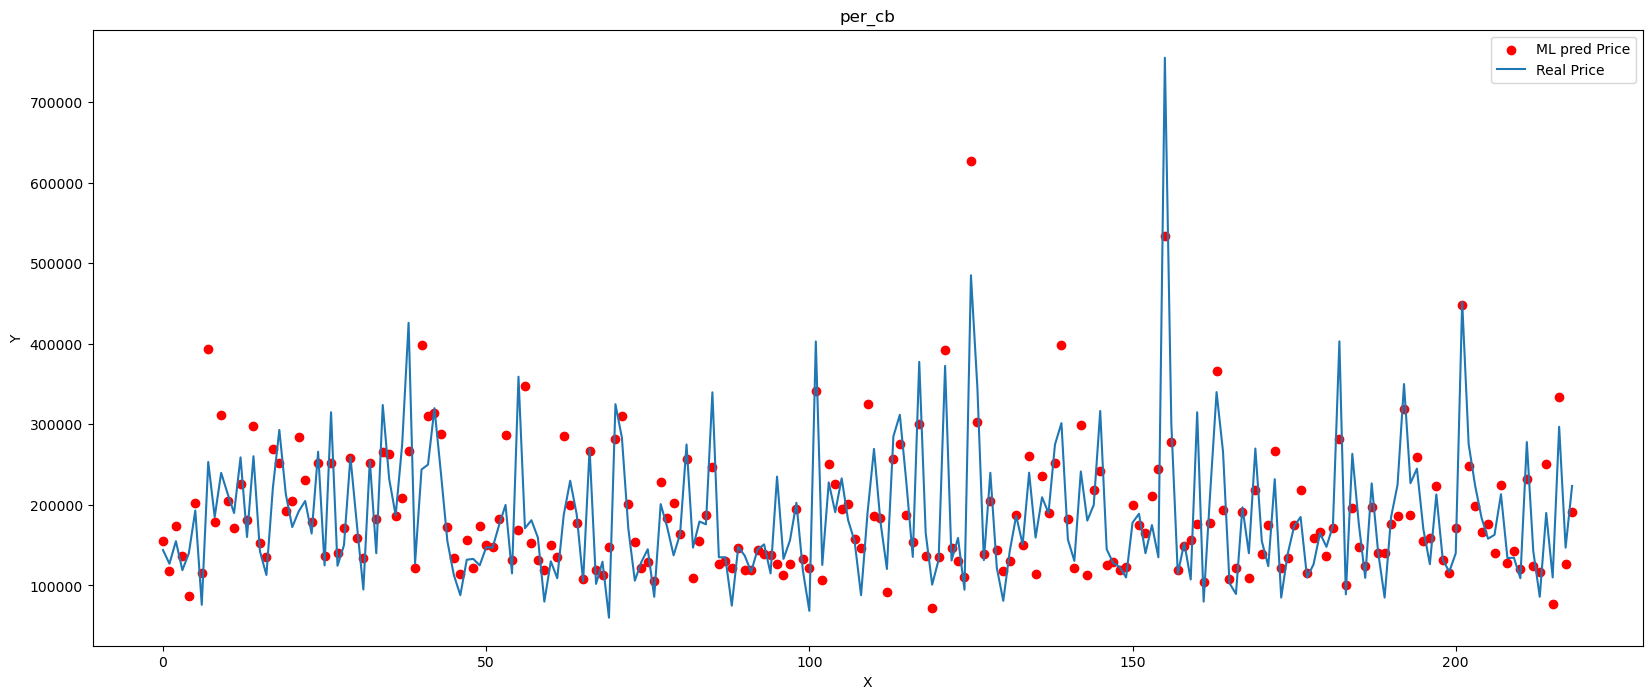

In [62]:
for i in range(len(ml_list)):
    x = list(range(len(ml_list[i])))
    y1 = ml_list[i]
    y2 = test_list[i]

    plt.figure(figsize=(20,8))
    plt.scatter(x, y1, label='ML pred Price',color="red")
    plt.plot(x, y2, label='Real Price')

    plt.title(name_list[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.show()
